# Processing EEG for Stimuli Research

## 1. Importing Necessary Libraries
Explanation:
- `mne` is a library for EEG data processing
- `numpy` is a library for numerical processing
- `matplotlib` is a library for plotting
- `pandas` is a library for data processing
- `os` is a library for operating system related functions

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tabulate import tabulate
import csv

from utils import *

## 2. Define Working Path

Working path is the path where the data is stored. The data is stored in the same folder as this notebook.

In [2]:
data_path = "EEG_EDF_Files_RSY"

## 3. Get List of Subject

**File Naming Convention**
`[subject_id]_[noise_type]_[read/nap]_EPOCX_[the_rest_of_timestamp].edf`

- `subject_id` is an integer starting from 1 as the subject number
- `noise_type` is either `brown` or `pink` or `white` or `silent` (for no noise)
- `read/nap` is showing the task that the subject is doing. `read` is for reading a book, `nap` is for taking a nap
- `the_rest_of_timestamp` is the timestamp of the recording based on EPOCX format


In [3]:
file_list = sorted(os.listdir(data_path))
print(f"File list: {file_list}")

File list: ['1_brown_nap.edf', '1_brown_read.edf', '1_pink_nap.edf', '1_pink_read.edf', '1_silent_nap.edf', '1_silent_read.edf', '1_white_nap.edf', '1_white_read.edf', '2_brown_nap.edf', '2_brown_read.edf', '2_pink_nap.edf', '2_pink_read.edf', '2_silent_nap.edf', '2_silent_read.edf', '2_white_nap.edf', '2_white_read.edf', '3_brown_nap.edf', '3_brown_read.edf', '3_pink_nap.edf', '3_pink_read.edf', '3_silent_nap.edf', '3_silent_read.edf', '3_white_nap.edf', '3_white_read.edf', '4_brown_nap.edf', '4_brown_read.edf', '4_pink_nap.edf', '4_pink_read.edf', '4_silent_nap.edf', '4_silent_read.edf', '4_white_nap.edf', '4_white_read.edf']


### 3.1. Create a Dataframe

In [4]:
data = []

for item in file_list:
    # split by underscore
    split_item = item.split('_')
    
    id_no = split_item[0]
    noise_type = split_item[1]
    task = split_item[2][:-4]
    full_path = os.path.join(data_path, item)
    
    # add to dataframe
    data.append({'subject': id_no, 'noise_type': noise_type, 'task': task, 'path': full_path})



In [5]:
df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════╤══════════════╤════════╤═════════════════════════════════════╕
│    │   subject │ noise_type   │ task   │ path                                │
╞════╪═══════════╪══════════════╪════════╪═════════════════════════════════════╡
│  0 │         1 │ brown        │ nap    │ EEG_EDF_Files_RSY\1_brown_nap.edf   │
├────┼───────────┼──────────────┼────────┼─────────────────────────────────────┤
│  1 │         1 │ brown        │ read   │ EEG_EDF_Files_RSY\1_brown_read.edf  │
├────┼───────────┼──────────────┼────────┼─────────────────────────────────────┤
│  2 │         1 │ pink         │ nap    │ EEG_EDF_Files_RSY\1_pink_nap.edf    │
├────┼───────────┼──────────────┼────────┼─────────────────────────────────────┤
│  3 │         1 │ pink         │ read   │ EEG_EDF_Files_RSY\1_pink_read.edf   │
├────┼───────────┼──────────────┼────────┼─────────────────────────────────────┤
│  4 │         1 │ silent       │ nap    │ EEG_EDF_Files_RSY\1_silent_nap.edf  │
├────┼───────────┼──────────

---

## 4. Processing Single Files

#### 4.1. Read the EDF

In [6]:
brown_nap_df = mne.io.read_raw_edf(df['path'][0], preload=True, verbose=False)
brown_nap_df = brown_nap_df.to_data_frame()

#### 4.2. Using Pre-configured Function
**Args:**
- `dataframe`: the dataframe that contains the information of the subject
- `freq_type`: the type of frequency that is going to be extracted. It can be `alpha`, `beta`, `delta`, `theta`, or `gamma`
- `fs`: the sampling frequency of the EEG data (Default: 256)
- `len_drop`: the length of the data that is going to be dropped from the beginning of the data (Default: 7680)
- `len_keep`: the length of the data that is going to be kept after dropping the beginning of the data (Default: 46080)
- `plot_psd`: whether to plot the filtered psd (Default: False)
- `return_psd`: whether to return the psd data (Default: False)
- `channel_drop`: the channels that are going to be dropped from the data (Default: `None`). Should be in list format and capital letters, for example: `['FP1', 'FP2']`

**Returns**:
- Output as a dictionary, containing:
    - `sum_raw`: sum_raw,
    - `avg_raw`: avg_raw,
    - `sum_filtered`: sum_filtered,
    - `avg_filtered`: avg_filtered,
    - `rel_pow`: rel_pow,
- *if `return_psd` is `True`*
    - `psd_raw`: psd_raw,
    - `psd_filtered`: psd_filtered

PSD_filered shape: (2, 23041)


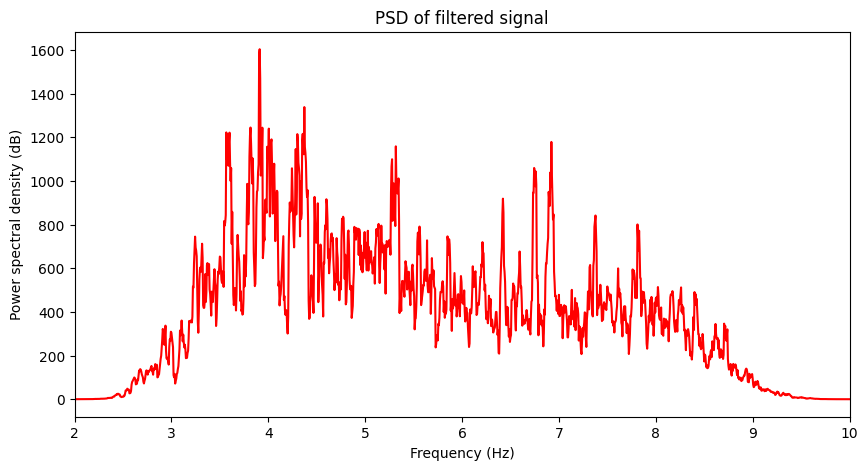

In [7]:
results = get_psd_feature(
    dataframe=brown_nap_df,
    freq_type='theta',
    plot_psd=True,
    channel_drop=['AF3', 'F7'],
    select_channels=['P7', 'FC6']
)

In [8]:
# for every key in results, print the key and the value
for key, value in results.items():
    print(f"{key}: {value}")

sum_raw: 17122927.42079365
avg_raw: 371.5751794799195
sum_filtered: 1150341.4201012822
avg_filtered: 24.9629230524127
rel_pow: 0.06718135233723742


In [ ]:
results = get_psd_feature(
    dataframe=brown_nap_df,
    freq_type='theta',
    plot_psd=True,
    channel_drop=['AF3', 'F7'],
    select_channels=['O1', 'F3']
)

In [ ]:
# for every key in results, print the key and the value
for key, value in results.items():
    print(f"{key}: {value}")

# 5. Processing Batch Files

**Recall The Dataframe (*So I won't forget*)**

In [ ]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

#### Iterate Every Row in the Dataframe

In [ ]:
data_root = "EEG_EDF_Files_RSY"

log_csv_path = 'run_log.csv'
if not os.path.exists(log_csv_path):
    # Create the csv file if it does not exist
    with open(log_csv_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['subject', 'noise_type', 'task', 'freq_type', 'sum_raw', 'avg_raw', 'sum_filtered', 'avg_filtered', 'rel_pow'])

# Open the csv file in append mode ('a') so that new rows can be added without overwriting the existing ones
with open(log_csv_path, 'a', newline='') as file:
    writer = csv.writer(file)
    
    if os.stat(log_csv_path).st_size == 0:
        writer.writerow(['subject_id', 'noise_type', 'task', 'freq_type', 'sum_raw_value', 'avg_raw_value', 'sum_filtered', 'avg_filtered', 'rel_pow'])

    for idx, row in df.iterrows():
        # Iterate through all edf
        print(f"Processing -> Index: {idx} | Subject: {row['subject']} | Noise Type: {row['noise_type']} | Task: {row['task']}")

        # get the information
        subject_id = str(row['subject'])
        noise_type = str(row['noise_type'])
        task = str(row['task'])

        signal_df = load_mnedf(row['path'])

        for freq_type in ['delta', 'theta', 'alpha', 'beta', 'gamma']:
            # define save_path
            save_path = os.path.join('output', subject_id, noise_type, task)
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            
            # Iterate through all freq types
            results = get_psd_feature(
                dataframe=signal_df,
                freq_type=freq_type,
                return_psd=True,
            )

            # Extract the specific values from the results
            sum_raw_value = results.get('sum_raw', 'N/A')
            avg_raw_value = results.get('avg_raw', 'N/A')
            sum_filtered = results.get('sum_filtered', 'N/A')
            avg_filtered = results.get('avg_filtered', 'N/A')
            rel_pow = results.get('rel_pow', 'N/A')

            # Write each result as a new row in the csv file
            writer.writerow([subject_id, noise_type, task, freq_type, sum_raw_value, avg_raw_value, sum_filtered, avg_filtered, rel_pow])
            
            # save results['psd_filtered']
            psd_filtered = results.get('psd_filtered', 'N/A')
            psd_filtered = psd_filtered.T
            psd_filtered_freqs = results.get('psd_filtered_freqs', 'N/A')
            psd_filtered = np.insert(psd_filtered, 0, psd_filtered_freqs, axis=1)
            header = ['freqs', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
            file_name = f"{freq_type}.csv"
            np.savetxt(os.path.join(save_path, file_name), psd_filtered, delimiter=',', header=','.join(header), comments=save_path)
            
            # if `freq_type` is `gamma`, save results['psd_raw']
            
            if freq_type == 'gamma':
                psd_raw = results.get('psd_raw', 'N/A')
                psd_raw = psd_raw.T
                psd_raw_freqs = results.get('psd_raw_freqs', 'N/A')
                psd_raw = np.insert(psd_raw, 0, psd_raw_freqs, axis=1)
                header = ['freqs', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
                file_name = f"raw.csv"
                np.savetxt(os.path.join(save_path, file_name), psd_raw, delimiter=',', header=','.join(header), comments=save_path)